In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score,ConfusionMatrixDisplay


In [38]:
cancer = pd.read_csv("data.csv")
print(cancer.head())
print(cancer.dtypes.head())
cancer["diagnosis"] = cancer["diagnosis"].astype("category")
cancer = cancer.drop(columns=["Unnamed: 32"], errors="ignore")

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [4]:
print(cancer.diagnosis.value_counts())

diagnosis
B    357
M    212
Name: count, dtype: int64


<Axes: xlabel='diagnosis', ylabel='radius_mean'>

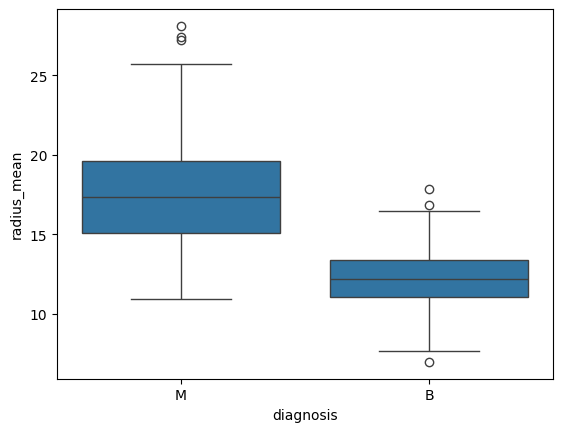

In [5]:
sns.boxplot(x="diagnosis", y="radius_mean", data=cancer)

In [6]:
cancer["Answer"] = 0
cancer.loc[cancer['diagnosis'].isin(['M']), "Answer"] = 1

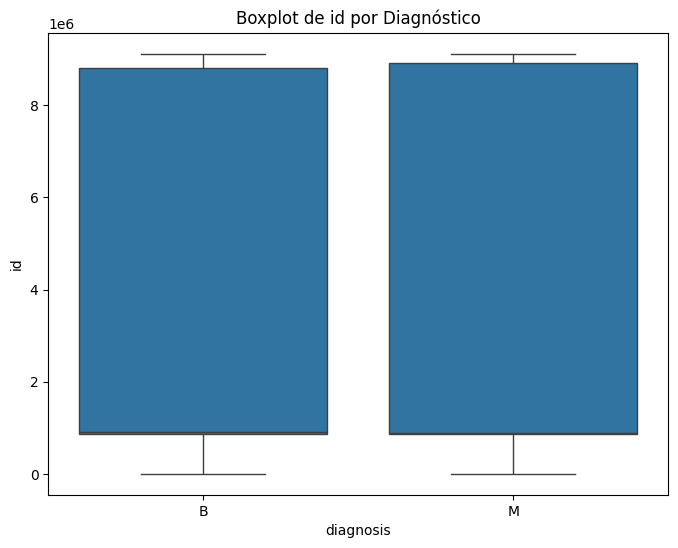

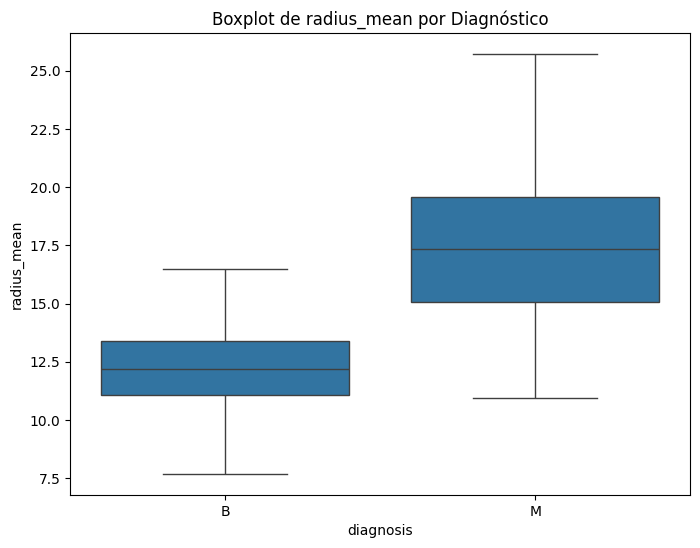

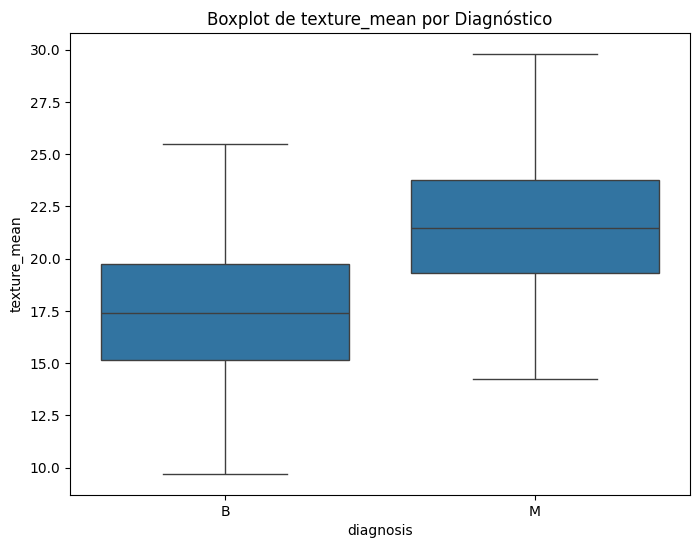

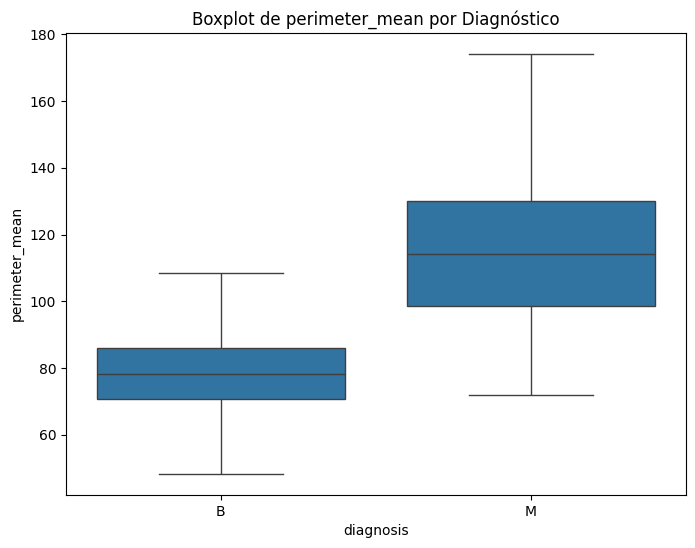

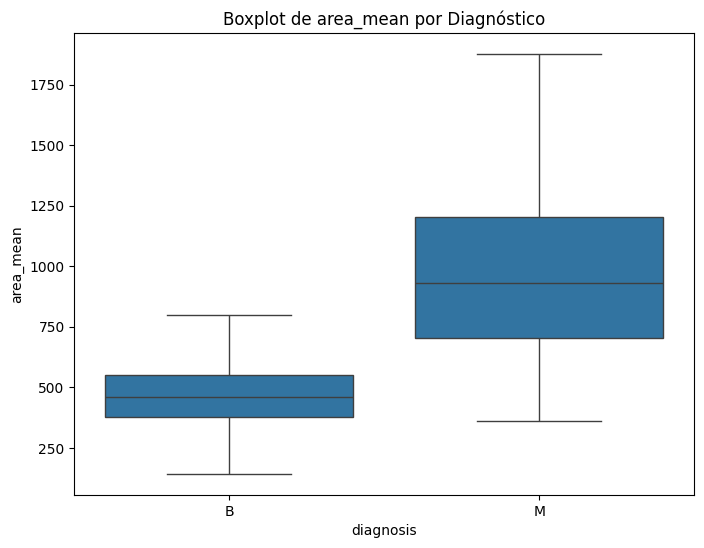

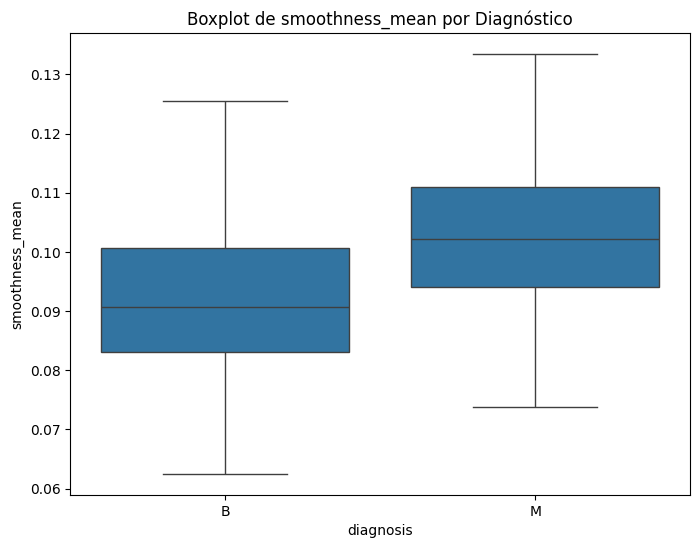

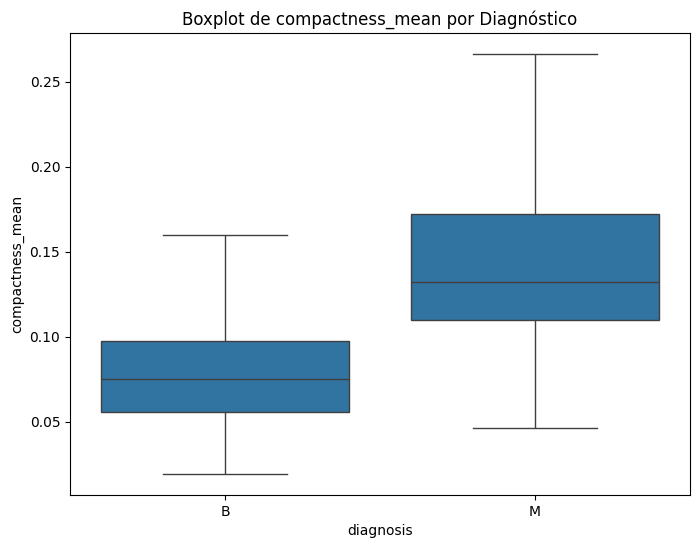

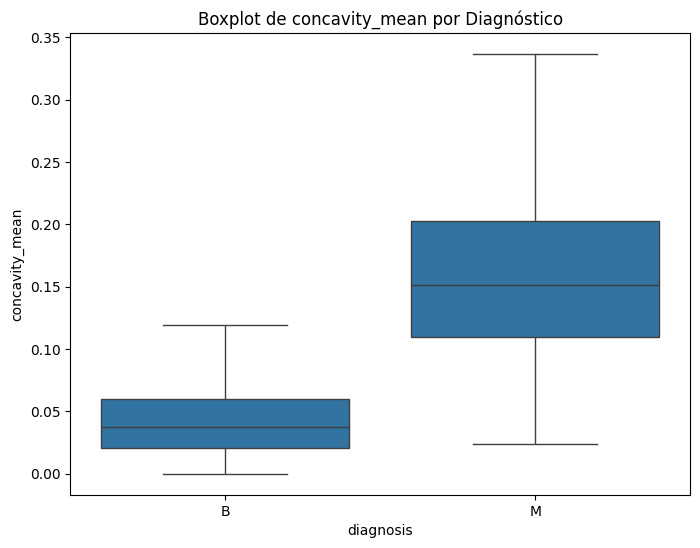

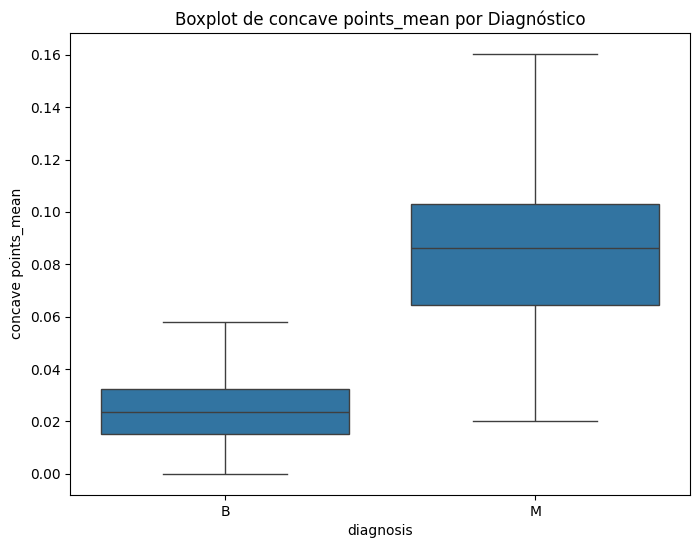

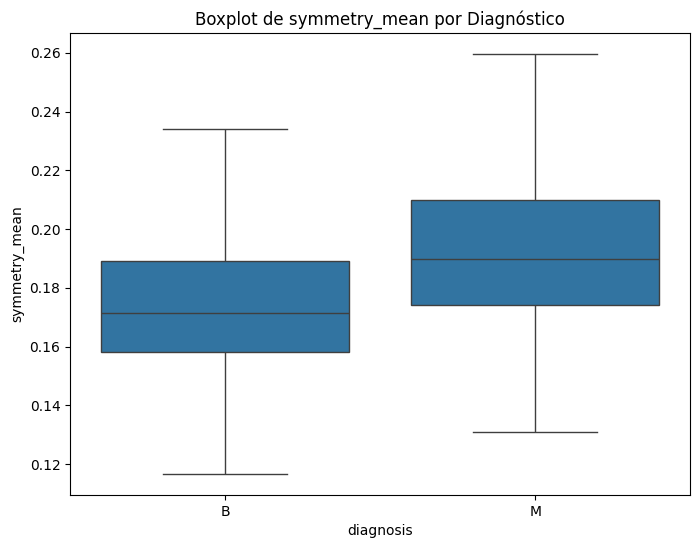

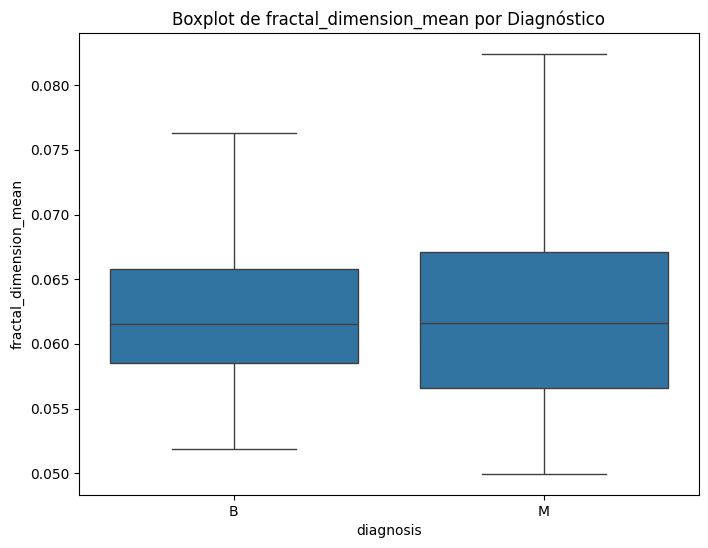

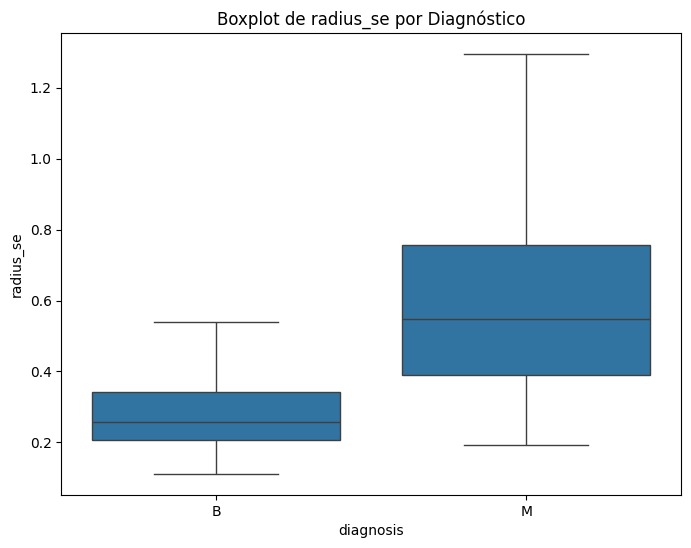

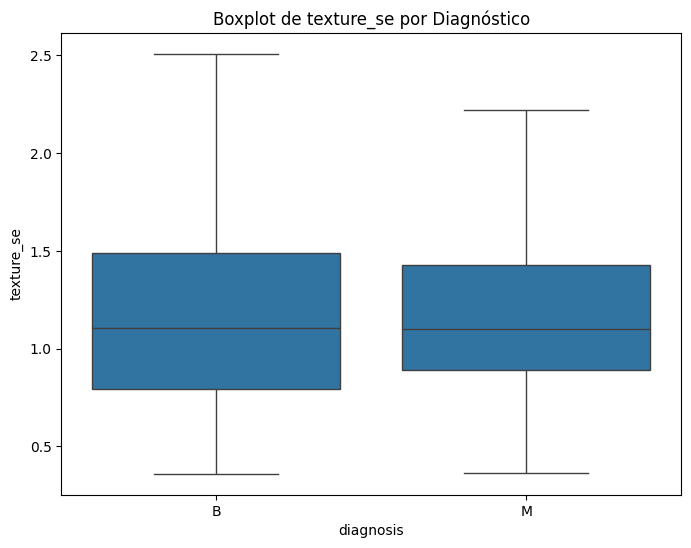

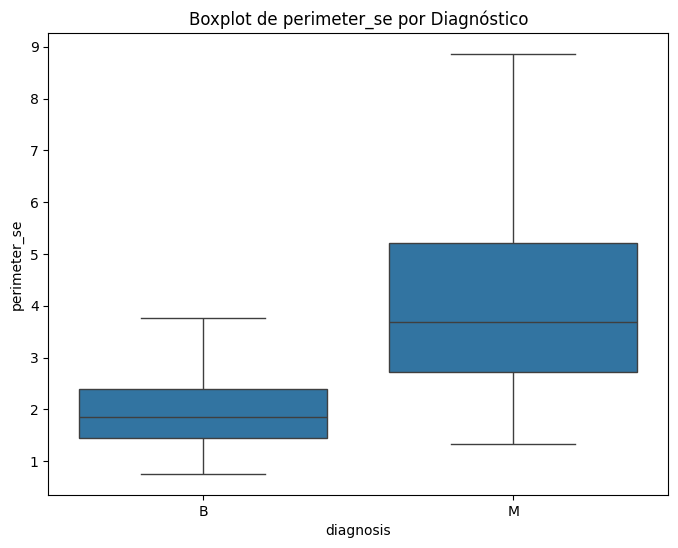

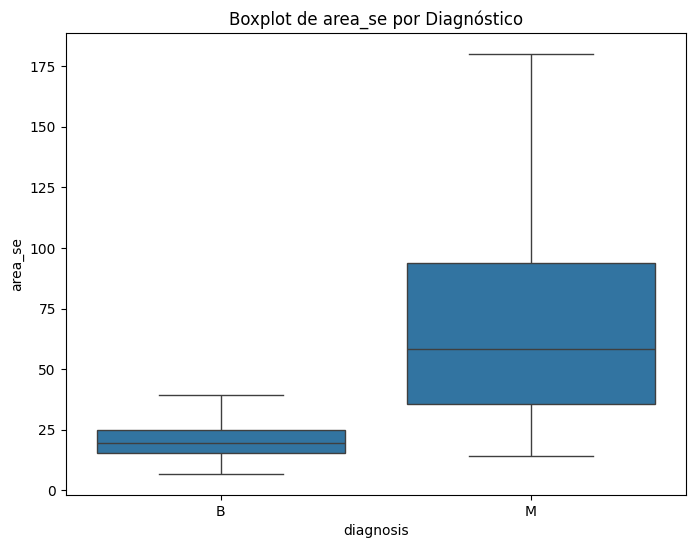

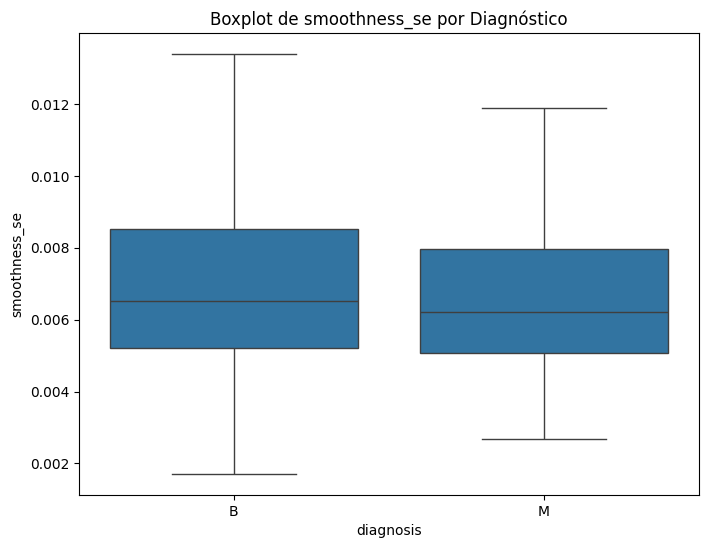

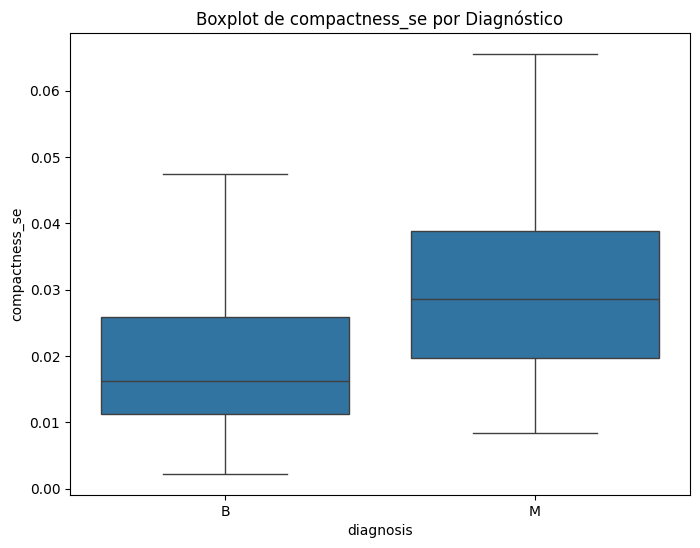

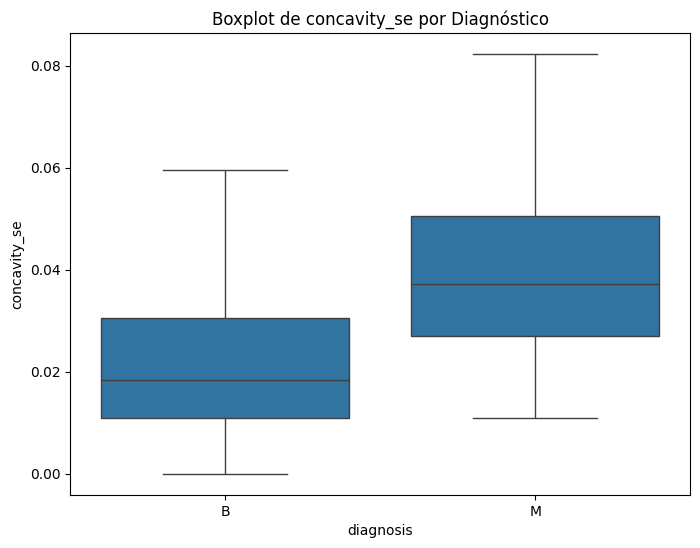

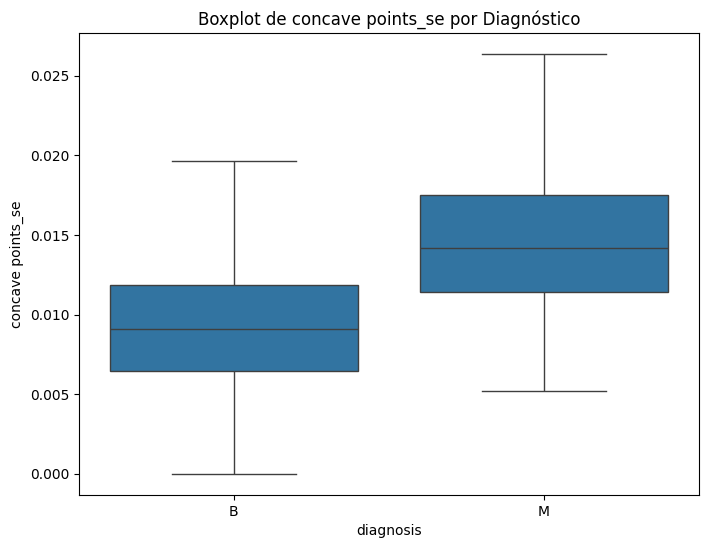

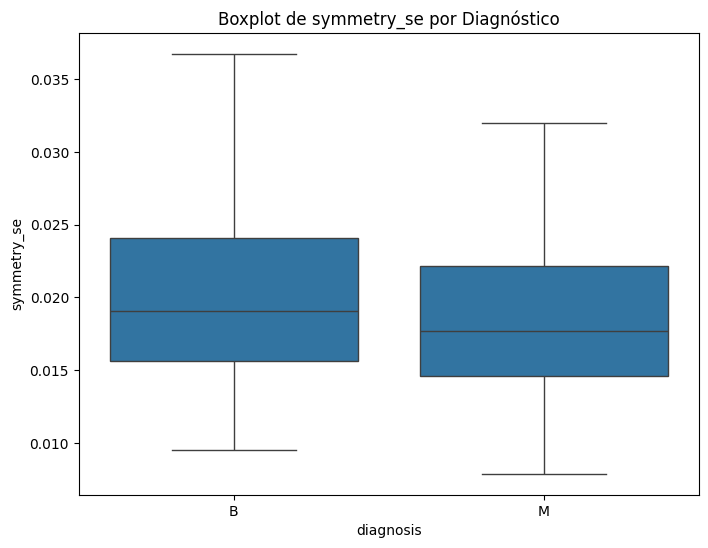

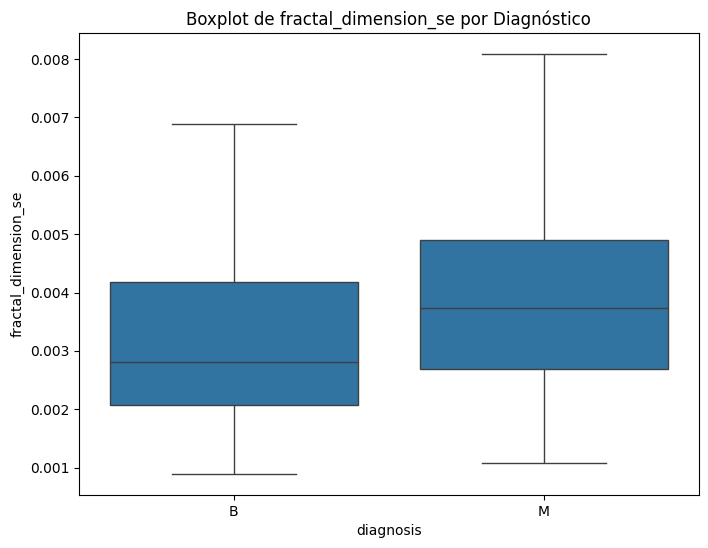

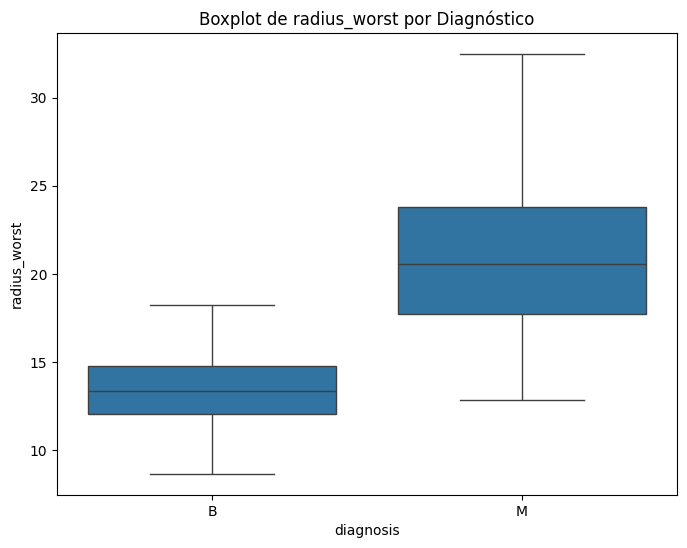

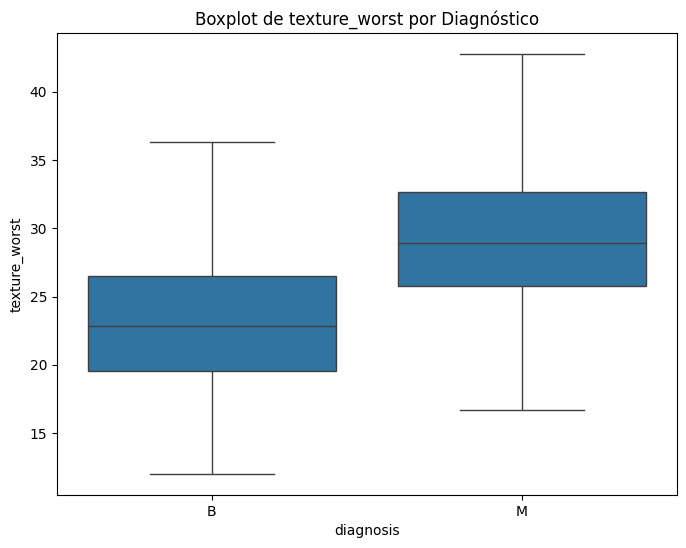

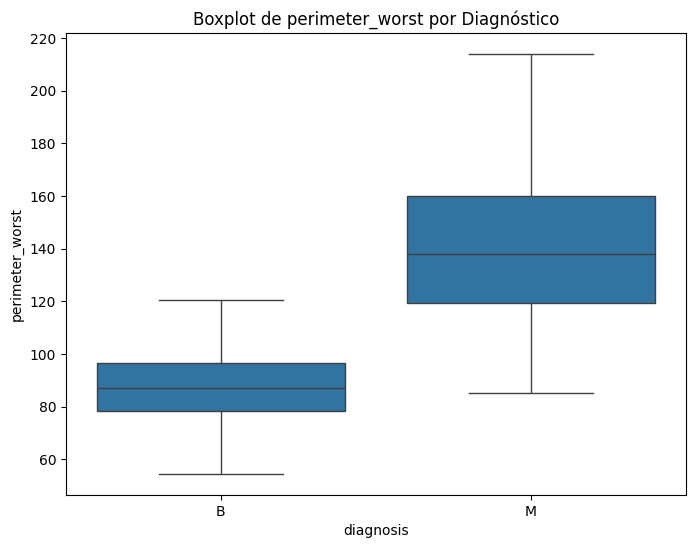

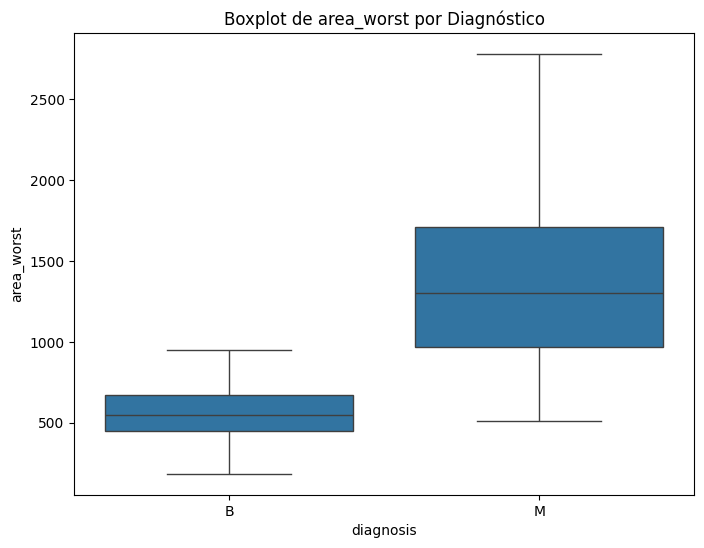

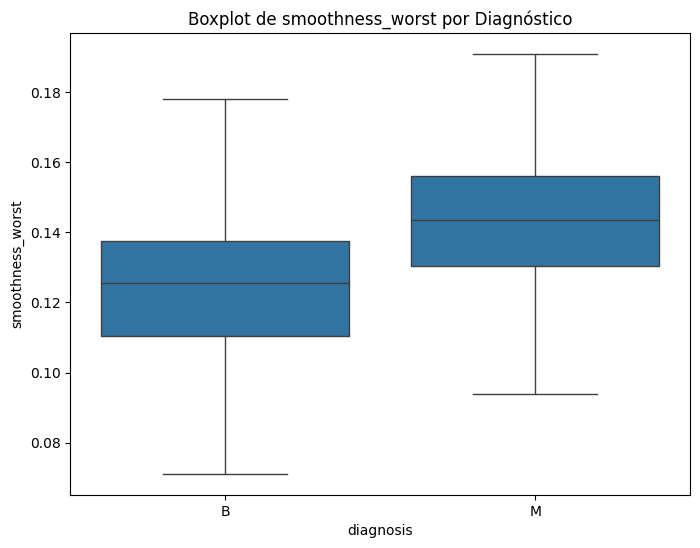

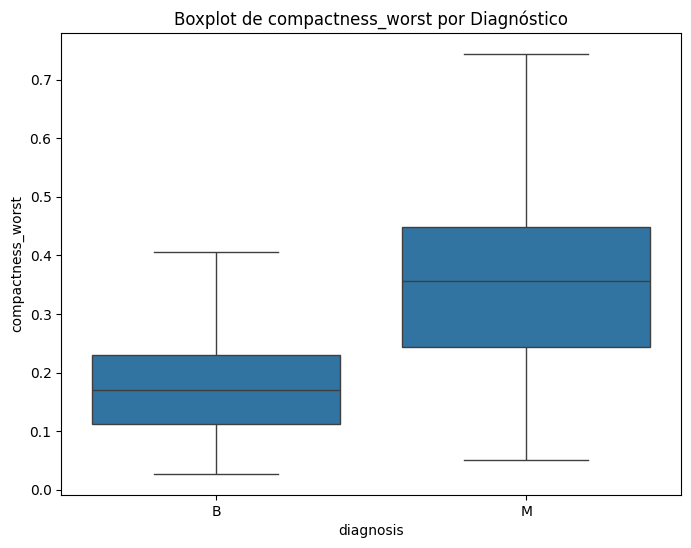

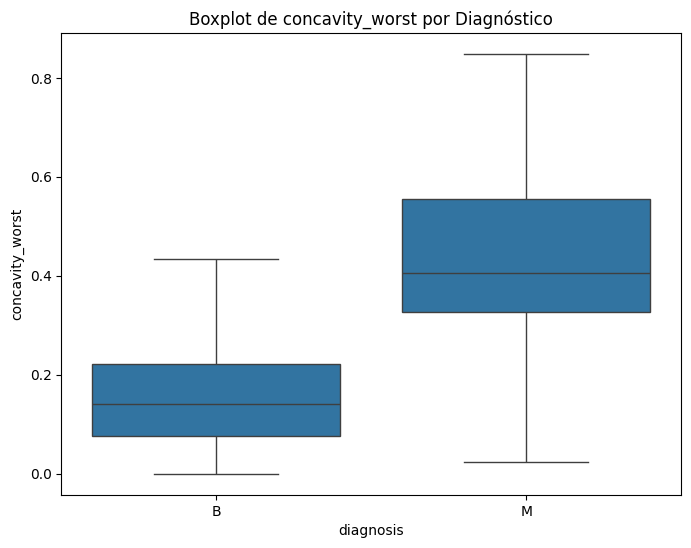

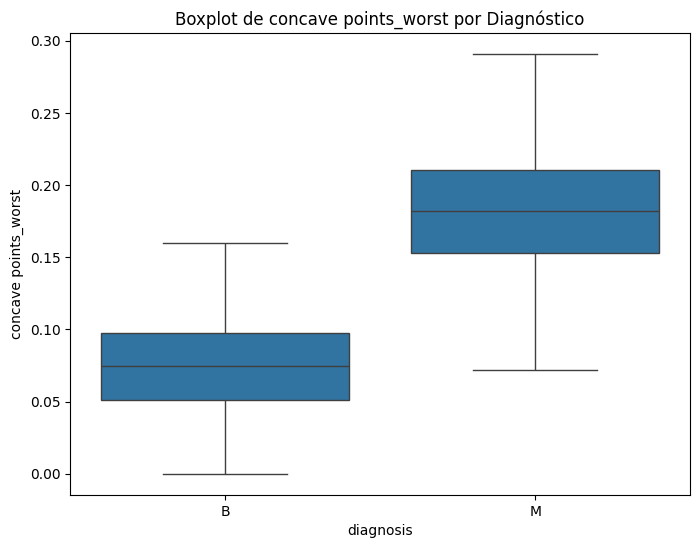

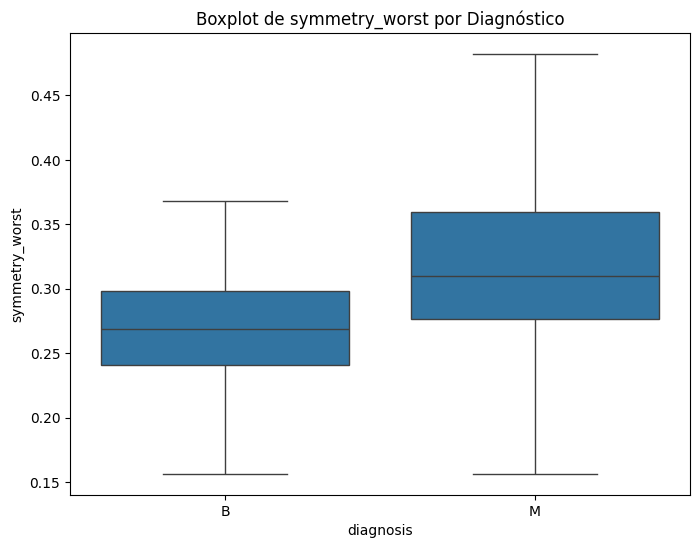

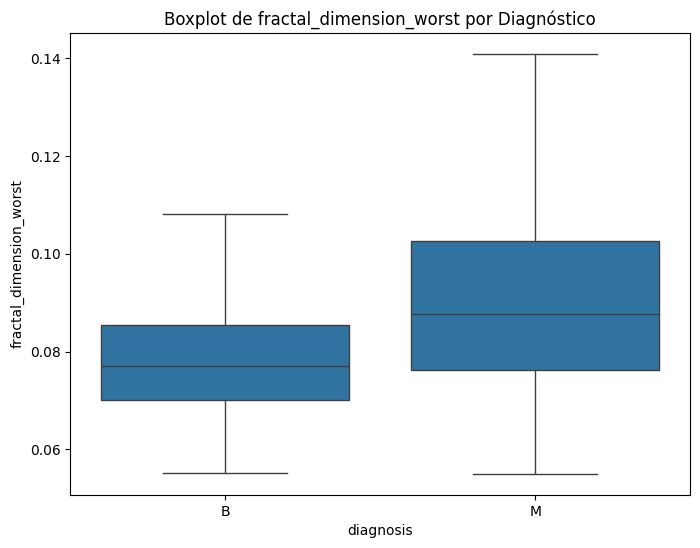

In [39]:
numeric_columns = cancer.select_dtypes(include = "number")
for col in numeric_columns:
    if col not in cancer.columns:
        print(f"Coluna {col} não encontrada no DataFrame!")
    else:
        plt.figure(figsize=(8,6))
        sns.boxplot(x="diagnosis", y=col, data=cancer, showfliers=False)
        plt.title(f"Boxplot de {col} por Diagnóstico")
        plt.show()

É possível analisar que as variáveis: radius_mean, texture_mean, compactness_mean e symmetry_mean interferem no resultado se o cancer é benigno ou maligno. Por essa razão, iremos utilizá-los para treinar o modelo de previsão de cancer

Então, iremos treinar o nosso modelo com base nesses parametros.

In [ ]:
predictors = cancer[['radius_mean', 'texture_mean', 'compactness_mean', 'symmetry_mean']]
result = cancer['Answer'] 
x_train, x_test, y_train, y_test = train_test_split(predictors, result, train_size = 0.8, test_size = 0.2)
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)




LogisticRegression()

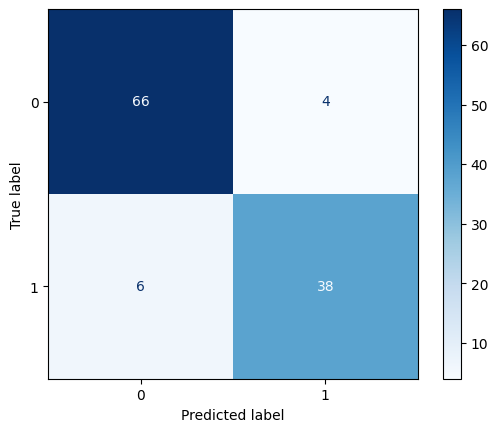

In [30]:
y_predicted = log_reg.predict(x_test)
cm = confusion_matrix(y_test, y_predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.show()

Pela matriz de confusão, foram analisados 66 verdadeiros positivos, 38 verdadeiros negativos, 4 falsos positivos e 6 falsos negativos. O que mostra um bom desempenho no geral do modelo de previsão de câncer. Analisaremos o score do modelo, agora.

In [ ]:
accuracy = accuracy_score(y_test, y_predicted)
precision = precision_score(y_test, y_predicted)
recall = recall_score(y_test, y_predicted
f1 = f1_score(y_test, y_predicted)

print(f'accuracy:\t{accuracy}')
print(f'precision:\t{precision}')
print(f'recall:\t{recall}')
print(f'f1-score:\t{f1}')



accuracy:	0.9122807017543859
precision:	0.9047619047619048
recall:	0.8636363636363636
f1-score:	0.8837209302325582
